This file has the code to crop images from F.G.'s journal using opencv - https://opencv.org/
Images of pages of F.G.'s journal (https://github.com/Vinaymy/wtf/tree/master/data/unlabeled_data) are cropped into typically 17 X 22 pixel tiles. Also the first part of the file contains some initial inspections and experiments.

Imports

In [0]:
!pip install image_slicer

import cv2
import numpy as cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, svm, metrics
import scipy
import os
from PIL import Image
import image_slicer

Process an image from F.G.'s journal and attempt to box the text

In [0]:
img = cv2.imread("wtf_dec012016.jpg")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#grayscale
gray = cv2.cvtColor(img_cvt, cv2.COLOR_BGR2GRAY)
#binary
_, thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
#dilation
kernel = np.ones((5,100), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
plt.imshow(img_dilation)

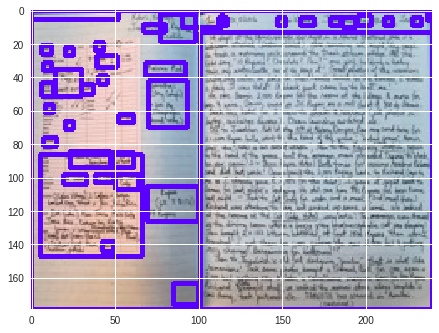

In [10]:
#find contours
im2,ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)

    # Getting ROI
    roi = img[y:y+h, x:x+w]

    # show ROI
    plt.imshow(roi)
    cv2.rectangle(img,(x,y),( x + w, y + h ),(90,0,255),2)

plt.imshow(img)

In [0]:
!mkdir cropped

Method to crop an image into tiles, followed by call to crop, then save cropped tiles to folder

In [0]:
def crop(path, input, height, width):
    im = Image.open(input)
    imgwidth, imgheight = im.size
    
    k = 1
    for i in range(0,imgheight,height):
        for j in range(0,imgwidth,width):
            box = (j, i, j+width, i+height)
            a = im.crop(box)
            try:
                a.save(os.path.join(path,"IMG-%s.png" % k))
                k += 1
            except Exception as e:
                print(e)
                pass
            
crop("cropped/", "wtf_dec01_2016.png", 22, 17)

In [0]:

tiles = image_slicer.slice('wtf_dec01_2016.png', 3000)

image_slicer.save_tiles(tiles, directory='./cropped',\
                            prefix='slice')